<a href="https://colab.research.google.com/github/igrosny/libros/blob/master/IMLP/Capitulo_2_Aprendizaje_automatico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capitulo 2: Aprendizaje supervisado
## Clasificacion y regresion

**Clasificacion** tiene como objetivo preddecir una clase. La clasificacion puede ser binaria o multiclass

**Regresion** tiene como objetivo predecir un numero continuo

### Generalizacion, Overfitting y Underfitting

In [1]:
!pip install mglearn

    100% |████████████████████████████████| 542kB 5.1MB/s 
  Running setup.py bdist_wheel for mglearn ... - \ | done
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
print(cancer.data.shape)

(569, 30)


In [4]:
import numpy as np

print(cancer.target_names)
np.bincount(cancer.target)


['malignant' 'benign']


array([212, 357])

In [5]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## K-Nearest Neighbor

### K-Neighbors Clasificacion

In [6]:
import mglearn
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [8]:
clf.fit(X_train, y_train)
KNeighborsClassifier(algorithm='auto',leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=1, n_neighbors=3, p=2,
                    weights='uniform')

clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [9]:
clf.score(X_test, y_test)

0.8571428571428571

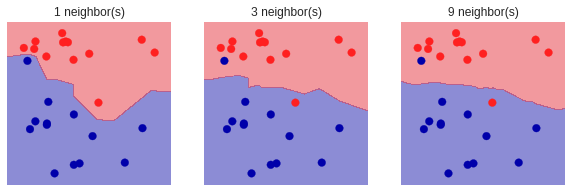

In [10]:
# Analizando KNeighborsClassifier
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  ax.scatter(X[:,0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
  ax.set_title("%d neighbor(s)" % n_neighbors)

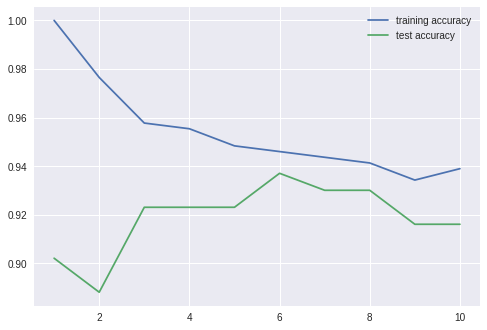

In [11]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# Prueba n vecinos de 1 a 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
  #build the model
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  # guarda la precision del entrenamiento
  training_accuracy.append(clf.score(X_train, y_train))
  #guarda la precision de la generalizacion
  test_accuracy.append(clf.score(X_test, y_test))
  
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.legend()
  

In [12]:
# Regresion K-Neighbors

from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# dividimos el set en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Inicializamos el model con n=3
reg = KNeighborsRegressor(n_neighbors=3)

# Entrenar el modelo
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                   metric_params=None, n_jobs=1, n_neighbors=3, p=2,
                   weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [13]:
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [14]:
reg.score(X_test, y_test)

0.8344172446249604

## Analizando K nearest neighbors regression

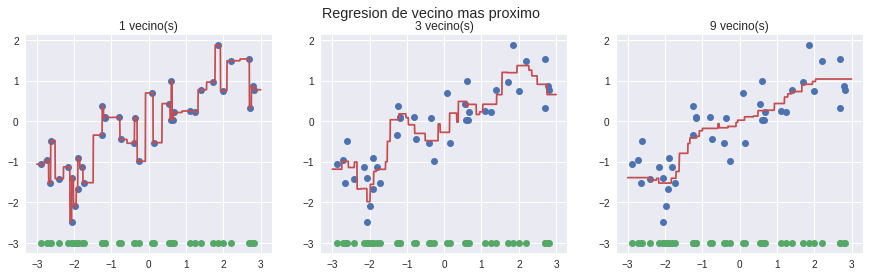

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Crea 1000 data points distribuidos equitativamente entre -3 y 3

line = np.linspace(-3, 3, 1000).reshape(-1, 1)
plt.suptitle("Regresion de vecino mas proximo")
for n_neighbors, ax in zip([1,3,9], axes):
  # Hace predicciones usando 1,3 y 9 vecinos
  reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X, y)
  ax.plot(X, y,'o')
  ax.plot(X, -3 * np.ones(len(X)), 'o')
  ax.plot(line, reg.predict(line))
  ax.set_title("%d vecino(s)" % n_neighbors)

# Modelos lineales

Son modelos que hacen predicciones usando funciones lineales



## Modelos lineales para regresion

Tiende a funcionar mejor cuantos mas features tiene

$y =w[0]*x[0] + w[1]*x[1] + ... + w[p]*x[p] + b$

w[0]: 0.393906  b: -0.031804


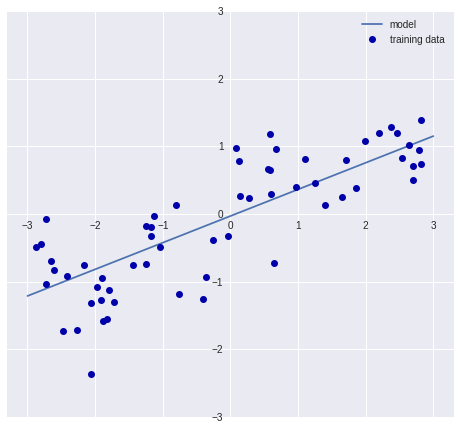

In [16]:
mglearn.plots.plot_linear_regression_wave()

## Regresion lineal aka minimos cuadrados ordinarios (Ordinary Least Squares)

Se trata basicamente de encontrar los parametros *w* y *b* para minimizar el *error cuadrado promedio*. El cual es la suma del cuadrado de la diferencia entre la prediccion y el valor real.



In [0]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [18]:
print("lr.coef_: %s" % lr.coef_)
print("lr.interecep_: %s" % lr.intercept_)


lr.coef_: [0.39390555]
lr.interecep_: -0.031804343026759746


In [19]:
print("Score de entrenamiento: %f" % lr.score(X_train, y_train))
print("test set score: %f" % lr.score(X_test, y_test))

# Vamos a ver que si bien los scores son bajos, son tambien bastantes parecidos 
# entre si. posiblemente underfitting

Score de entrenamiento: 0.670089
test set score: 0.659337


In [20]:
# Boston tiene 106 features
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Score de entrenamiento: %f" % lr.score(X_train, y_train))
print("test set score: %f" % lr.score(X_test, y_test))

# Aca podemos ver un claro overfitting, scorea bien en ewntrenamiento pero mal
# con el test

Score de entrenamiento: 0.952052
test set score: 0.607472


In [21]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Score de entrenamiento: %f" % lr.score(X_train, y_train))
print("test set score: %f" % lr.score(X_test, y_test))

Score de entrenamiento: 0.952052
test set score: 0.607472


In [22]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Score de entrenamiento: %f" % ridge10.score(X_train, y_train))
print("test set score: %f" % ridge10.score(X_test, y_test))

Score de entrenamiento: 0.788279
test set score: 0.635941


In [23]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Score de entrenamiento: %f" % ridge01.score(X_train, y_train))
print("test set score: %f" % ridge01.score(X_test, y_test))

Score de entrenamiento: 0.928227
test set score: 0.772207


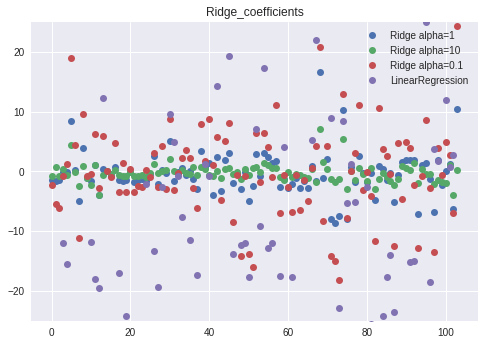

In [24]:
plt.title("Ridge_coefficients")
plt.plot(ridge.coef_, 'o', label='Ridge alpha=1')
plt.plot(ridge10.coef_, 'o', label='Ridge alpha=10')
plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.ylim(-25,25)
plt.legend()

In [25]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Score de set de entrenamiento: %f" % lasso.score(X_train, y_train))
print("Score de set de test: %f" % lasso.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso.coef_ != 0))


Score de set de entrenamiento: 0.293238
Score de set de test: 0.209375
number of features used: 4


In [26]:
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print("Score de set de entrenamiento: %f" % lasso001.score(X_train, y_train))
print("Score de set de test: %f" % lasso001.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso001.coef_ != 0))


Score de set de entrenamiento: 0.896112
Score de set de test: 0.767800
number of features used: 32


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [27]:
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print("Score de set de entrenamiento: %f" % lasso00001.score(X_train, y_train))
print("Score de set de test: %f" % lasso00001.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso00001.coef_ != 0))

Score de set de entrenamiento: 0.942093
Score de set de test: 0.697654
number of features used: 100


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


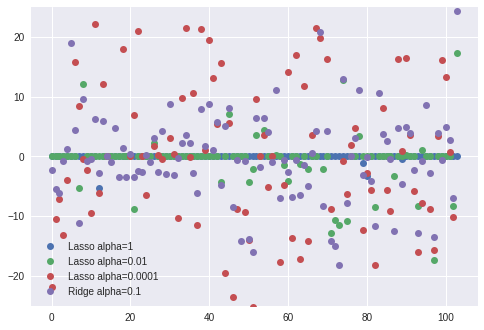

In [28]:
plt.plot(lasso.coef_,'o', label="Lasso alpha=1")
plt.plot(lasso001.coef_,'o', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_,'o', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_,'o', label="Ridge alpha=0.1")
plt.ylim(-25, 25)
plt.legend()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


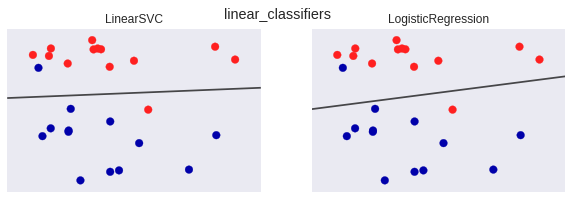

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
plt.suptitle("linear_classifiers")

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
  clf = model.fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
  ax.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
  ax.set_title("%s" % clf.__class__.__name__)